<a href="https://colab.research.google.com/github/bhardwaj0027/Deep-Learning-CSL312/blob/main/experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP#0: Import Libraries

In [ ]:

!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

In [ ]:

import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## STEP #1: Import *Dataset*

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


temp_df = pd.read_csv('/content/diabetes.csv')

In [ ]:
temp_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
temp_df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
temp_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


`## STEP #2: Visualization of Dataset`

## STEP #3: Creating Training & Testing Dataset

In [ ]:
X_train = temp_df.loc[:, temp_df.columns != "Outcome"]
y_train = temp_df[["Outcome"]]

## STEP #4: Build & Train the Model

In [ ]:
X_train.shape

(768, 8)

In [ ]:
y_train.shape

(768, 1)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 12, input_shape = (8,)))
model.add(tf.keras.layers.Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 12, input_shape = (8,)))
model.add(tf.keras.layers.Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=30, validation_split = 0.2)

Epoch 1/30
20/20 [==============================] - 1s 13ms/step - loss: 2721249.2500 - val_loss: 1598726.7500
Epoch 2/30
20/20 [==============================] - 0s 4ms/step - loss: 324856.8750 - val_loss: 655.5362
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 15199.7100 - val_loss: 1175.9440
Epoch 4/30
20/20 [==============================] - 0s 3ms/step - loss: 1178.8778 - val_loss: 513.8167
Epoch 5/30
20/20 [==============================] - 0s 4ms/step - loss: 236.7798 - val_loss: 117.6755
Epoch 6/30
20/20 [==============================] - 0s 4ms/step - loss: 59.0628 - val_loss: 24.8584
Epoch 7/30
20/20 [==============================] - 0s 4ms/step - loss: 28.1224 - val_loss: 22.8741
Epoch 8/30
20/20 [==============================] - 0s 6ms/step - loss: 22.0837 - val_loss: 17.2370
Epoch 9/30
20/20 [==============================] - 0s 5ms/step - loss: 17.8176 - val_loss: 14.4242
Epoch 10/30
20/20 [==============================] - 0s 6ms/step - loss: 1

In [ ]:
import sklearn

In [ ]:
predictions = model.predict(X_train)


24/24 [==============================] - 0s 2ms/step


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

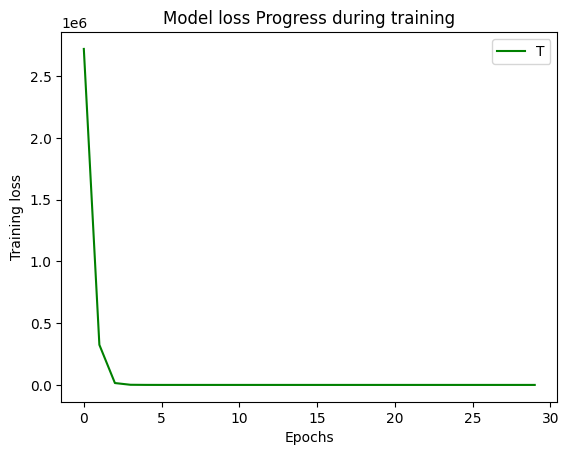

In [ ]:
plt.plot(epochs_hist.history['loss'], color='green', label='Training loss')
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()